## Importing necessary libararies 

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Uploading, Visualizing and cleaning the database

In [212]:
# Load dataset
df = pd.read_csv("C:/Users/ebuka/Desktop/credit/credit_risk_dataset.csv")
print(df.shape)
print(df.head())

(32581, 12)
   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                   

In [213]:
# Check for null valuues in the dataset
print(df.isnull().sum())
df.head()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [214]:
# Fill missing numerical values with median
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Fill missing categorical values with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])
print(df.isnull().sum())
df.head()


person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [215]:
# Remove unrealistic ages (e.g., <18 or >100)
df = df[(df['person_age'] >= 18) & (df['person_age'] <= 100)]

# Remove extremely high incomes (optional - use 99th percentile)
upper_limit = df['person_income'].quantile(0.99)
df = df[df['person_income'] <= upper_limit]


## Renaming some columns for easier understanding

In [216]:
# Check your current column names first
print("Before renaming:\n", df.columns)

Before renaming:
 Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')


In [217]:
# Rename columns (example mapping)
df = df.rename(columns={
    'person_emp_length': 'months_employed',
    'loan_amnt': 'loan_amount',
    'loan_int_rate': 'loan_interest_rate',
    'cb_person_default_on_file': 'prev_default',
    'cb_person_cred_hist_length': 'credit_history_length',
})


In [218]:

# Check after renaming
print("\nAfter renaming:\n", df.columns)


After renaming:
 Index(['person_age', 'person_income', 'person_home_ownership',
       'months_employed', 'loan_intent', 'loan_grade', 'loan_amount',
       'loan_interest_rate', 'loan_status', 'loan_percent_income',
       'prev_default', 'credit_history_length'],
      dtype='object')


In [219]:

# Employment length missing? Replace -1 with 0 (if dataset encodes it this way)
if 'person_emp_length' in df.columns:
    df['person_emp_length'] = df['person_emp_length'].replace(-1, 0)
# Display cleaned dataset
print(df.shape)

(32252, 12)


In [220]:
# Drop duplicates if any
df = df.drop_duplicates()

# Check cleaned dataset
print(df.shape)
df.head()


(32089, 12)


,person_age,person_income,person_home_ownership,months_employed,loan_intent,loan_grade,loan_amount,loan_interest_rate,loan_status,loan_percent_income,prev_default,credit_history_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


## Adding Important columns to the database 

In [221]:

# Create Debt-to-Income ratio
df['DTI_Ratio'] = df['loan_amount'] / (df['person_income'] + 1)


# Loan_to_Income ratio
df['Loan_to_Income'] = df['loan_amount'] / (df['person_income'] + 1)   # +1 avoids division by zero

# Employment bins (categorize months employed)
def employment_bin(months):
    if months <= 6:
        return '0-6 months'
    elif months <= 24:
        return '6-24 months'
    else:
        return '2+ years'

df['Employment_Group'] = df['months_employed'].apply(employment_bin)

# Previous default flag (turn Y/N into 1/0)
if 'prev_default' in df.columns:
    df['prev_default'] = df['prev_default'].map({'Y': 1, 'N': 0})


In [222]:
print(df[['Loan_to_Income', 'Employment_Group', 'prev_default']].head())


   Loan_to_Income Employment_Group  prev_default
0        0.593210         2+ years             1
1        0.104156       0-6 months             0
2        0.572857       0-6 months             0
3        0.534343       0-6 months             0
4        0.643371      6-24 months             1


## Now to determine people best qualified for loans 


Default rate by Loan-to-Income group:
  LoanIncome_Group  loan_status
0      High (>60%)     0.784314
1      Low (<=30%)     0.152463
2  Medium (31-60%)     0.689315


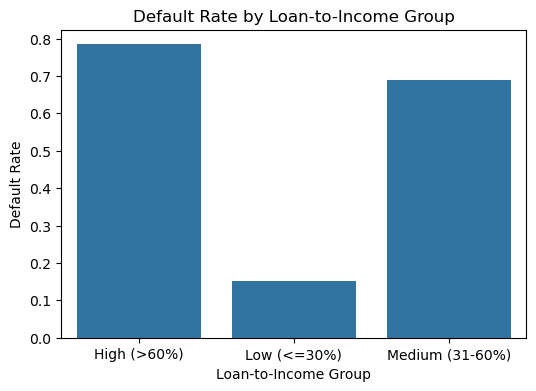

In [223]:


# Define LTI categories 
def lti_category(x):
    if x <= 0.3:
        return 'Low (<=30%)'
    elif x <= 0.6:
        return 'Medium (31-60%)'
    else:
        return 'High (>60%)'

df['LoanIncome_Group'] = df['Loan_to_Income'].apply(lti_category)

loan_income_rates = df.groupby('LoanIncome_Group')['loan_status'].mean().reset_index()

print("\nDefault rate by Loan-to-Income group:")
print(loan_income_rates)


# Chart to represent relationship between Loan-to-Income groups and default rates
lti_rates = df.groupby('LoanIncome_Group')['loan_status'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(x='LoanIncome_Group', y='loan_status', data=lti_rates)
plt.title("Default Rate by Loan-to-Income Group")
plt.ylabel("Default Rate")
plt.xlabel("Loan-to-Income Group")
plt.show()



### Borrowers with high Loan to Income rate are most likely to default 


Default rate by Employment Group:
  Employment_Group  loan_status
0       0-6 months     0.236810
1         2+ years     0.181818
2      6-24 months     0.173546


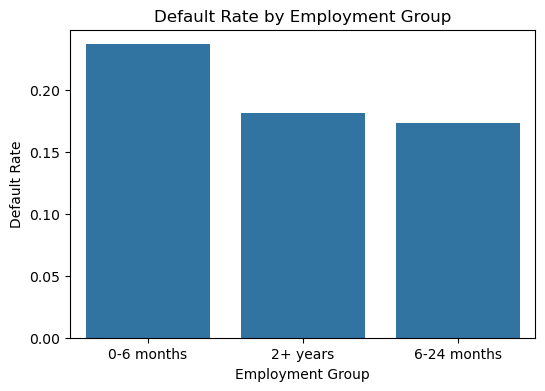

In [224]:

# Employment Group 
emp_rates = df.groupby('Employment_Group')['loan_status'].mean().reset_index()

print("\nDefault rate by Employment Group:")
print(emp_rates)



# Chart to represent relationship between Employment groups and default rates
emp_rates = df.groupby('Employment_Group')['loan_status'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(x='Employment_Group', y='loan_status', data=emp_rates)
plt.title("Default Rate by Employment Group")
plt.ylabel("Default Rate")
plt.xlabel("Employment Group")
plt.show()


###  From this result people with 0-6 month employment period have the most default risk.


Default rate by Previous Default Flag:
   prev_default  loan_status
0             0     0.185322
1             1     0.380439


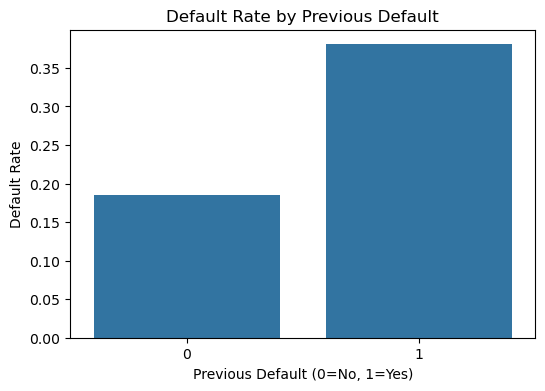

In [225]:
# Previous Default Flag
if 'prev_default' in df.columns:
    prev_def_rates = df.groupby('prev_default')['loan_status'].mean().reset_index()
    print("\nDefault rate by Previous Default Flag:")
    print(prev_def_rates)

    # Chart to represent relationship between Previous Default Flag and default rates
    plt.figure(figsize=(6, 4))
    sns.barplot(x='prev_default', y='loan_status', data=prev_def_rates)
    plt.title("Default Rate by Previous Default")
    plt.ylabel("Default Rate")
    plt.xlabel("Previous Default (0=No, 1=Yes)")
    plt.show()

### This shows that borrowers who defaulted before are very likely to default again.

         DTI_Group  loan_status
0      Bad (>=50%)     0.764706
1     Good (<=35%)     0.181122
2  Medium (36-49%)     0.711856


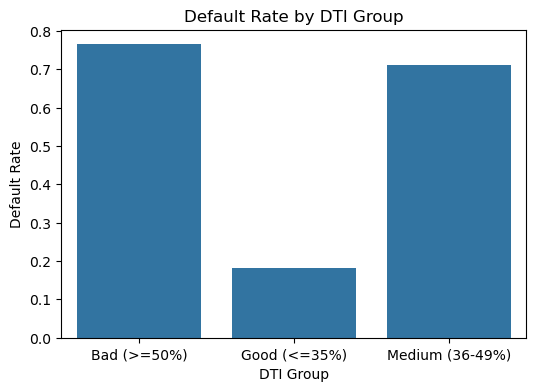

In [226]:

# Define DTI categories
def dti_category(dti):
    if dti <= 0.35:
        return 'Good (<=35%)'
    elif dti <= 0.49:
        return 'Medium (36-49%)'
    else:
        return 'Bad (>=50%)'

df['DTI_Group'] = df['DTI_Ratio'].apply(dti_category)

# Calculate default rate by group
default_rates = df.groupby('DTI_Group')['loan_status'].mean().reset_index()

print(default_rates)

# Chart to represent relationship between DTI groups and default rates
dti_rates = df.groupby('DTI_Group')['loan_status'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(x='DTI_Group', y='loan_status', data=dti_rates)
plt.title("Default Rate by DTI Group")
plt.ylabel("Default Rate")
plt.xlabel("DTI Group")
plt.show()

### This means people with low DTI default only 18% of the time while people with medium DTI default 71% of the time and people with high DTI default over 76% of the time.